In [102]:
import pandas as pd
df=pd.read_csv('ibm_stock.csv')
df.drop(['High', 'Low','Volume','Open','Adj Close'], axis=1, inplace=True)

In [161]:
import numpy as np

In [103]:
df.head()

,Date,Close
0,2017-01-03,167.190002
1,2017-01-04,169.259995
2,2017-01-05,168.699997
3,2017-01-06,169.529999
4,2017-01-09,167.649994


In [104]:
#Converting Date into timestamp 
from datetime import datetime
a=[]
for i in range(0,754):
    x=df['Date'][i]
    datetime_obj=datetime.strptime(x,'%Y-%m-%d')
    a.append(datetime.timestamp(datetime_obj))
    


In [105]:
df['Date']=a

In [106]:
df.head()

,Date,Close
0,1.483382e+09,167.190002
1,1.483468e+09,169.259995
2,1.483555e+09,168.699997
3,1.483641e+09,169.529999
4,1.483900e+09,167.649994


In [107]:
#Creating training and testing dataset
from sklearn.model_selection import train_test_split
train,test = train_test_split(df, test_size = 0.2,random_state=2)

x_train = train.drop('Close', axis=1)
y_train = train['Close']

x_test = test.drop('Close', axis = 1)
y_test = test['Close']

In [108]:
x_tr=x_train
y_tr=y_train
x_ts=x_test
y_ts=y_test

In [109]:
#Scaling data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled)

x_test_scaled = scaler.fit_transform(x_test)
x_test = pd.DataFrame(x_test_scaled)

In [110]:
#For different k using Grid Search Method
#import required packages
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline
rmse_val = [] #to store rmse values for different k
for K in range(100):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(x_train, y_train)  #fit the model
    pred=model.predict(x_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

#Final k=27 havin 

RMSE value for k=  1 is: 6.319179578519851
RMSE value for k=  2 is: 6.186923169987606
RMSE value for k=  3 is: 5.904581115559953
RMSE value for k=  4 is: 5.910591991375373
RMSE value for k=  5 is: 5.801684255172337
RMSE value for k=  6 is: 5.853817444823108
RMSE value for k=  7 is: 5.658598308329975
RMSE value for k=  8 is: 5.65626714902283
RMSE value for k=  9 is: 5.588007794773518
RMSE value for k=  10 is: 5.504499514974901
RMSE value for k=  11 is: 5.36251116024929
RMSE value for k=  12 is: 5.377644702322242
RMSE value for k=  13 is: 5.2473253170629
RMSE value for k=  14 is: 5.298681005919521
RMSE value for k=  15 is: 5.205931130424183
RMSE value for k=  16 is: 5.213673050356123
RMSE value for k=  17 is: 5.198544574791256
RMSE value for k=  18 is: 5.193438765198603
RMSE value for k=  19 is: 5.1499499430019275
RMSE value for k=  20 is: 5.058047072986296
RMSE value for k=  21 is: 4.996654580293451
RMSE value for k=  22 is: 5.018320983791763
RMSE value for k=  23 is: 4.967874005931231


In [111]:
min(rmse_val)


4.903609513628105

In [112]:
k=27
model = neighbors.KNeighborsRegressor(n_neighbors = K)
model.fit(x_train, y_train)  #fit the model
pred=model.predict(x_test) #make prediction on test set


In [151]:
dp=pd.DataFrame({'Actual':y_test,'Predicted':pred})
dp['Date']=x_ts
sort_by_time = dp.sort_values('Date')
sort_by_time.head()

,Actual,Predicted,Date
1,169.259995,167.0634,1.483468e+09
15,178.289993,167.0634,1.485283e+09
18,175.800003,167.0634,1.485715e+09
20,174.289993,167.0634,1.485887e+09
22,175.820007,167.0634,1.486060e+09


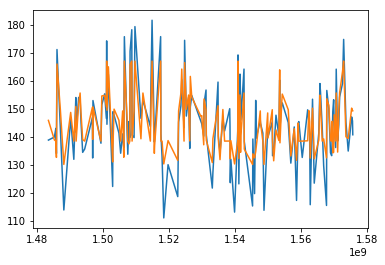

In [154]:
#plotting the y_test and y_pred
import matplotlib.pyplot as plt
plt.plot(sort_by_time['Date'],dp['Actual'])
plt.plot(sort_by_time['Date'],dp['Predicted'])

In [162]:
#MAPE
def get_mape(y_true, y_pred): 
    """
    Compute mean absolute percentage error (MAPE)
    """
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [163]:
get_mape(sort_by_time['Actual'],sort_by_time['Predicted'])

4.213092241515077

In [164]:
from statsmodels.tools.eval_measures import rmse
rmse(sort_by_time['Actual'],sort_by_time['Predicted'])

7.372768630772975